In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
from matplotlib import pyplot as pt

In [ ]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [ ]:
  dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE

)

NotFoundError: ignored

In [ ]:
class_names = dataset.class_names
class_names

NameError: ignored

In [ ]:
len(dataset)

NameError: ignored

In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 0 0 2 0 0 0 0 0 1 0 1 0 1 0]


In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0])


tf.Tensor(
[[[128. 128. 140.]
  [124. 124. 136.]
  [128. 128. 138.]
  ...
  [161. 159. 172.]
  [162. 160. 173.]
  [164. 162. 175.]]

 [[135. 135. 147.]
  [130. 130. 142.]
  [132. 132. 142.]
  ...
  [160. 158. 171.]
  [160. 158. 171.]
  [158. 156. 169.]]

 [[140. 140. 152.]
  [134. 134. 146.]
  [134. 134. 144.]
  ...
  [160. 158. 171.]
  [157. 155. 168.]
  [153. 151. 164.]]

 ...

 [[152. 150. 161.]
  [159. 157. 168.]
  [165. 163. 174.]
  ...
  [193. 195. 207.]
  [190. 192. 204.]
  [191. 193. 205.]]

 [[150. 148. 159.]
  [154. 152. 163.]
  [159. 157. 168.]
  ...
  [194. 196. 208.]
  [193. 195. 207.]
  [191. 193. 205.]]

 [[151. 149. 160.]
  [150. 148. 159.]
  [150. 148. 159.]
  ...
  [181. 183. 195.]
  [184. 186. 198.]
  [180. 182. 194.]]], shape=(256, 256, 3), dtype=float32)


In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[131. 129. 142.]
  [111. 109. 122.]
  [ 65.  63.  76.]
  ...
  [153. 158. 177.]
  [152. 157. 176.]
  [151. 156. 175.]]

 [[134. 132. 145.]
  [ 72.  70.  83.]
  [115. 113. 126.]
  ...
  [149. 154. 173.]
  [149. 154. 173.]
  [149. 154. 173.]]

 [[114. 112. 125.]
  [119. 117. 130.]
  [122. 120. 133.]
  ...
  [146. 151. 170.]
  [146. 151. 170.]
  [147. 152. 171.]]

 ...

 [[118. 116. 130.]
  [106. 104. 118.]
  [122. 120. 134.]
  ...
  [164. 166. 178.]
  [169. 171. 183.]
  [175. 177. 189.]]

 [[140. 138. 152.]
  [122. 120. 134.]
  [103. 101. 115.]
  ...
  [177. 179. 191.]
  [182. 184. 196.]
  [186. 188. 200.]]

 [[113. 111. 125.]
  [ 84.  82.  96.]
  [116. 114. 128.]
  ...
  [173. 175. 187.]
  [172. 174. 186.]
  [169. 171. 183.]]]


In [ ]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].shape)

(256, 256, 3)


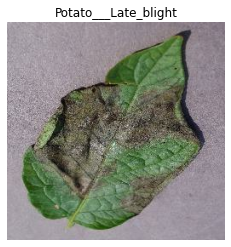

In [ ]:
for image_batch, label_batch in dataset.take(1):
    pt.imshow(image_batch[0].numpy().astype("uint8"))
    pt.title(class_names[label_batch[0]])
    pt.axis("off")

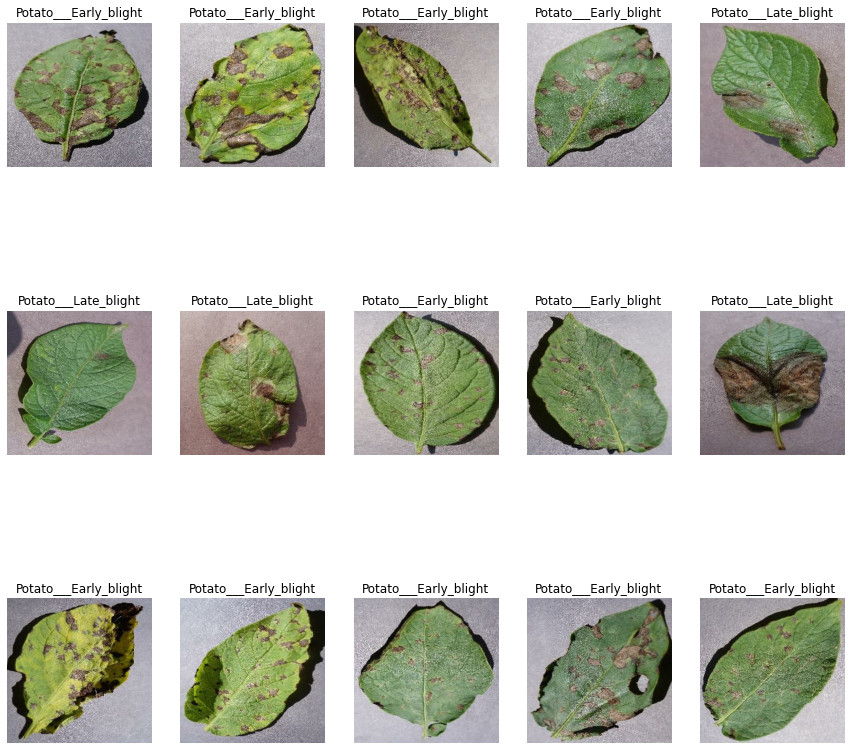

In [ ]:
pt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(15):
        ax = pt.subplot(3,5,i+1)
        pt.imshow(image_batch[i].numpy().astype("uint8"))
        pt.title(class_names[label_batch[i]])
        pt.axis("off")

In [ ]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [ ]:
train_ds = dataset.take(54)
len(train_ds)

54

In [ ]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [ ]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [ ]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [ ]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [ ]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [ ]:
len(train_ds)

54

In [ ]:
len(val_ds)

6

In [ ]:
len(test_ds)

8

In [ ]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
     layers.experimental.preprocessing.Rescaling(1.0/255)
]
)

In [ ]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),


])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds

)

Epoch 1/50
54/54 [==============================] - 98s 2s/step - loss: 0.9194 - accuracy: 0.4583 - val_loss: 0.9245 - val_accuracy: 0.4427
Epoch 2/50
54/54 [==============================] - 86s 2s/step - loss: 0.8500 - accuracy: 0.5544 - val_loss: 0.7970 - val_accuracy: 0.6667
Epoch 3/50
54/54 [==============================] - 88s 2s/step - loss: 0.5878 - accuracy: 0.7755 - val_loss: 0.9585 - val_accuracy: 0.5833
Epoch 4/50
54/54 [==============================] - 89s 2s/step - loss: 0.4841 - accuracy: 0.7980 - val_loss: 0.4293 - val_accuracy: 0.8438
Epoch 5/50
54/54 [==============================] - 85s 2s/step - loss: 0.3327 - accuracy: 0.8675 - val_loss: 0.4286 - val_accuracy: 0.8646
Epoch 6/50
54/54 [==============================] - 91s 2s/step - loss: 0.2448 - accuracy: 0.9115 - val_loss: 0.1853 - val_accuracy: 0.9323
Epoch 7/50
54/54 [==============================] - 93s 2s/step - loss: 0.1956 - accuracy: 0.9253 - val_loss: 0.2946 - val_accuracy: 0.9271
Epoch 8/50
54/54 [==

In [ ]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 3s 240ms/step - loss: 0.1573 - accuracy: 0.9648


In [ ]:
scores

[0.15733999013900757, 0.96484375]

In [ ]:
history

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [ ]:
history.history['accuracy']

[0.4583333432674408,
 0.5543981194496155,
 0.7754629850387573,
 0.7980324029922485,
 0.8674768805503845,
 0.9114583134651184,
 0.9253472089767456,
 0.9143518805503845,
 0.9299768805503845,
 0.9403935074806213,
 0.9409722089767456,
 0.953125,
 0.9571759104728699,
 0.953125,
 0.9652777910232544,
 0.9641203880310059,
 0.9542824029922485,
 0.96875,
 0.9728009104728699,
 0.9728009104728699,
 0.9739583134651184,
 0.9820601940155029,
 0.9791666865348816,
 0.9826388955116272,
 0.9826388955116272,
 0.9774305820465088,
 0.9745370149612427,
 0.9832175970077515,
 0.9901620149612427,
 0.9913194179534912,
 0.9913194179534912,
 0.9739583134651184,
 0.984375,
 0.9913194179534912,
 0.9849537014961243,
 0.9855324029922485,
 0.9936342835426331,
 0.9884259104728699,
 0.9797453880310059,
 0.9907407164573669,
 0.9646990895271301,
 0.9814814925193787,
 0.9947916865348816,
 0.9959490895271301,
 0.9918981194496155,
 0.9884259104728699,
 0.9861111044883728,
 0.9884259104728699,
 0.9942129850387573,
 0.994212985

In [ ]:
len(history.history['accuracy'])

50

In [ ]:
acc=history.history['accuracy']
vali_acc=history.history['val_accuracy']
loss=history.history['loss']
vali_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

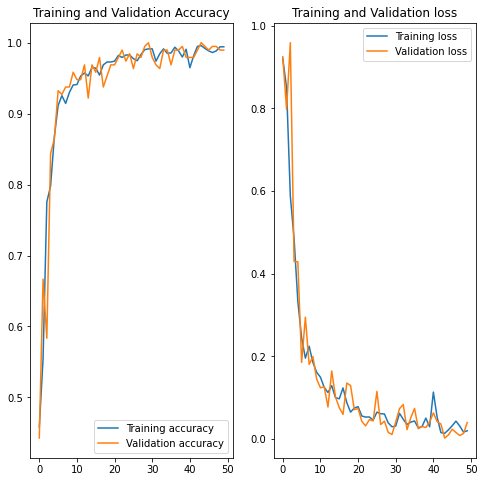

In [ ]:
pt.figure(figsize=(8,8))
pt.subplot(1,2,1)
pt.plot(range(EPOCHS), acc, label='Training accuracy')
pt.plot(range(EPOCHS), vali_acc, label='Validation accuracy')
pt.legend(loc='lower right')
pt.title('Training and Validation Accuracy')

pt.subplot(1,2,2)
pt.plot(range(EPOCHS), loss, label='Training loss')
pt.plot(range(EPOCHS), vali_loss, label='Validation loss')
pt.legend(loc='upper right')
pt.title('Training and Validation loss')



In [ ]:
import numpy as np

first image to predict
actual label:  Potato___Late_blight
predicted label: Potato___Late_blight


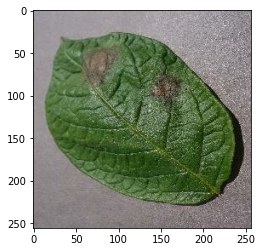

In [ ]:
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label= labels_batch [0].numpy()

    print("first image to predict")
    pt.imshow(first_image)

    print("actual label: ",class_names[first_label])
    batch_prediction=model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])


In [ ]:
def predict(model, img):

    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions=model.predict(img_array)

    predicted_class= class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)

    return predicted_class, confidence

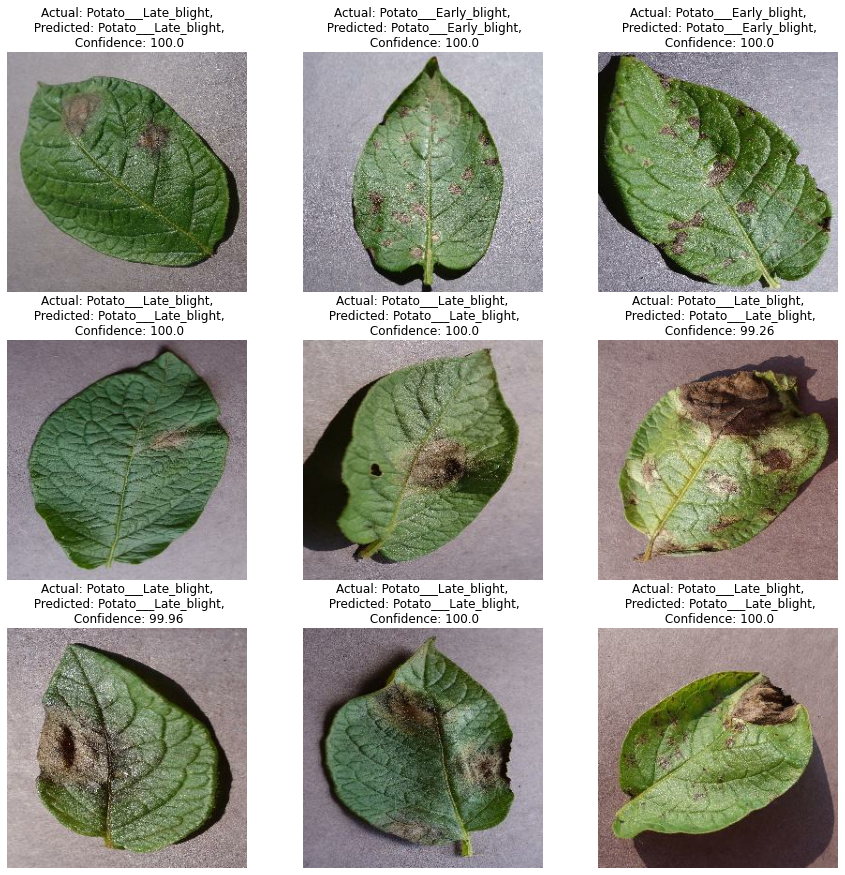

In [ ]:
pt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):

    for i in range(9) :

        ax = pt.subplot(3, 3, i+1)
        pt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]

        pt.title(f"Actual: {actual_class},\n Predicted: {predicted_class},\n Confidence: {confidence}")

        pt.axis("off")